In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


    

In [6]:
depth_dist = []
quality_dist = []
allele_freq = []

In [7]:
for line in open('annot.vcf'):
    if line.startswith("chr") == False:
        continue
    
    fields = line.strip().split()
    info = fields[7].split(";")
    
    try:
        dd = int(info[7][3:])
    except ValueError:
        pass
    depth_dist.append(dd)
    
    try:
        qd = int(info[26][3:])
    except ValueError:
        pass
    quality_dist.append(qd)
    
    try:
        af = float(info[3][3:])
    except ValueError:
        pass
    allele_freq.append(af)

In [9]:
variants = {}   
annot = ''
for line in open('annot.vcf'):
    if line.startswith("chr") == False:
        continue    
    fields = line.strip().split()
    info = fields[7].split(";")
    
    for fields in info:
        if 'ANN' in fields: 
            annot = fields[4:].split("|")[1]
        elif annot == '':
            continue
        else:
            variants.setdefault(annot, 0)
            variants[annot] +=1

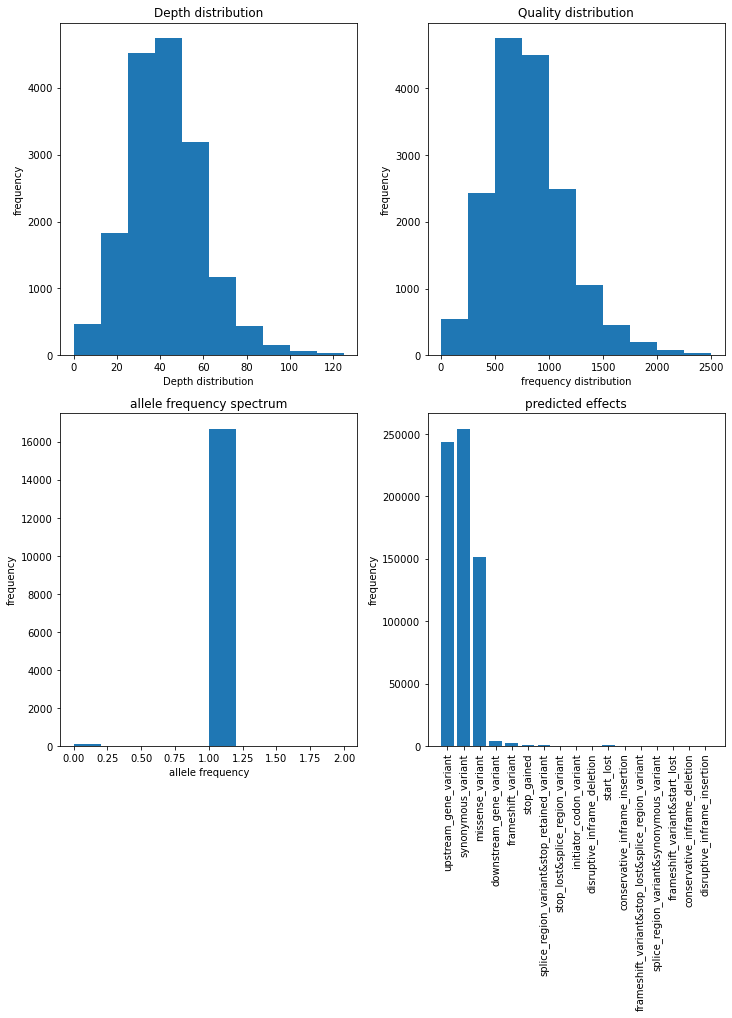

In [11]:
fig, ax = plt.subplots(2,2, figsize = (11,11))
ax[0,0].hist (depth_dist, range = [0,125])
ax[0,0].set_title("Depth distribution")
ax[0,0].set_ylabel("frequency")
ax[0,0].set_xlabel("Depth distribution")
ax[0,1].hist (quality_dist, range = [0,2500])
ax[0,1].set_title("Quality distribution")
ax[0,1].set_ylabel("frequency")
ax[0,1].set_xlabel("frequency distribution")
ax[1,0].hist (allele_freq, range = [0,2])
ax[1,0].set_title("allele frequency spectrum")
ax[1,0].set_ylabel("frequency")
ax[1,0].set_xlabel("allele frequency")
ax[1,1].bar (variants.keys(), variants.values())
ax[1,1].set_title("predicted effects")
ax[1,1].set_ylabel("frequency")
fig.tight_layout()
plt.xticks(rotation = 90)
plt.show()